# Time Series Decomposition Methods
Time series decomposition is a statistical technique used to break down a time series data into its underlying components or sources of variation. The primary goal of time series decomposition is to separate the data into these components, which typically include:

__Trend Component:__ The trend component represents the long-term movement or direction in the time series data. It captures systematic and persistent changes over time, such as overall growth or decline. Trends can be linear, nonlinear, or seasonal trends, depending on the data.

__Seasonal Component:__ The seasonal component accounts for the regular, repeating patterns or cycles that occur within the time series. These patterns often have a fixed frequency, like daily, weekly, monthly, or annually, and are associated with external factors like seasons or holidays.

__Residual Component (or Error):__ The residual component, also known as the error or noise, includes any remaining variations in the data that cannot be attributed to the trend or seasonality. It represents the random or irregular fluctuations that are left unexplained by the trend and seasonal components.

Time series decomposition is a fundamental step in time series analysis and forecasting. By isolating these components, you can gain a clearer understanding of the underlying patterns and dynamics in the data. Here are some common methods and Python code implementations for time series decomposition.

For these examples, I'll assume you have a time series dataset in a pandas DataFrame with a datetime index. If you don't have one, you can load your data into a DataFrame or use sample data for testing.

In [1]:
!pip install yprov4ml

In [2]:
import yprov4ml

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Start the provenance run
yprov4ml.start_run(
    prov_user_namespace="www.example.og",
    experiment_name="functional_decomposition",
    provenance_save_dir="/content/"
)

[codecarbon WARNING @ 19:23:59] Multiple instances of codecarbon are allowed to run at the same time.


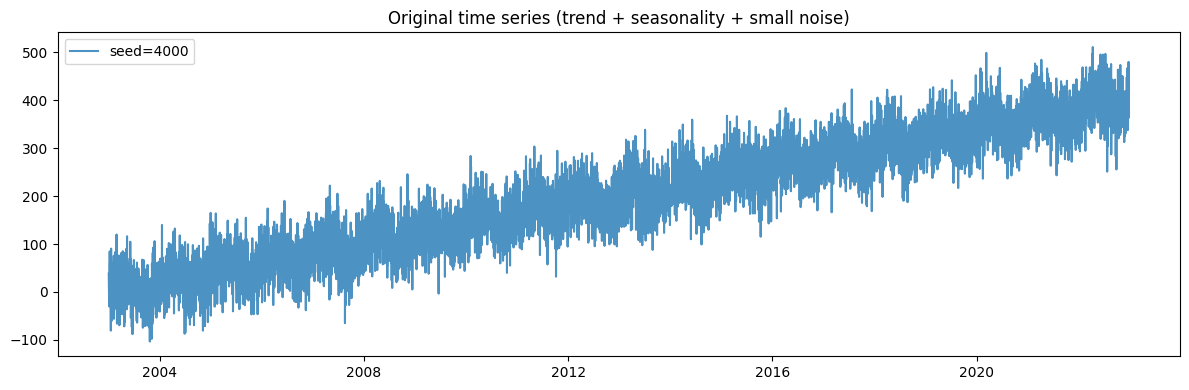

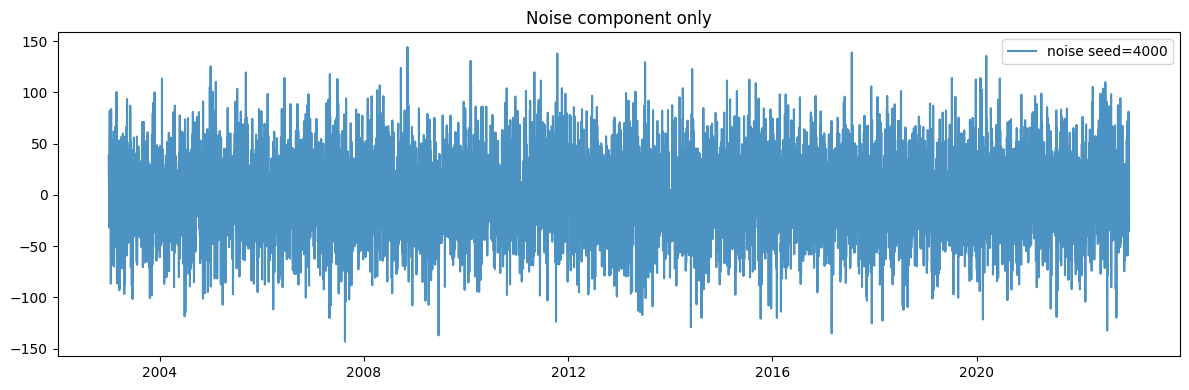

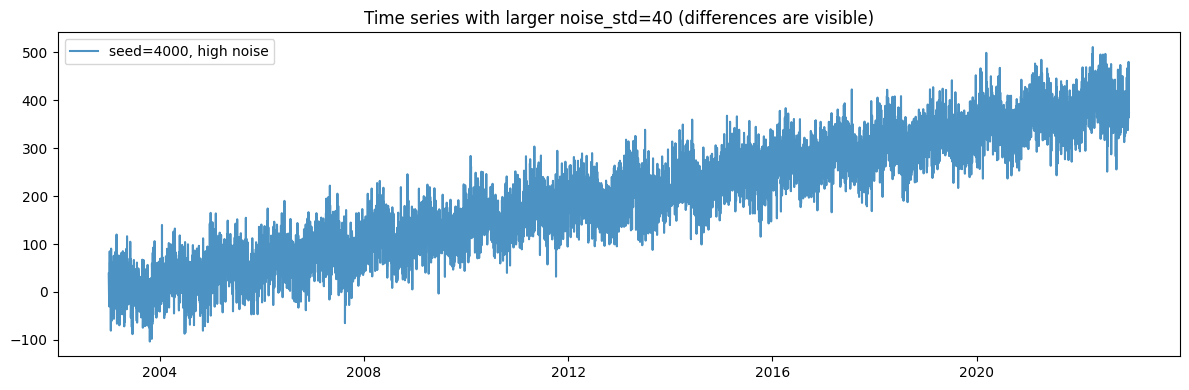

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Time series generator
# -----------------------------
def generateTimeSeries(duration=20*365, frequency='D', seed=None,
                       noise_std=40, trend_max=400, season_amp=20):

    if seed is not None:
        np.random.seed(seed)

    time = pd.date_range(start='2003-01-01', periods=duration, freq=frequency)
    trend = np.linspace(0, trend_max, duration)
    seasonality = season_amp * np.sin(40 * np.pi * np.arange(duration) / duration)
    noise = np.random.normal(0, noise_std, duration)
    value = trend + seasonality + noise
    data = pd.DataFrame({
        'time': time,
        'value': value,
        'trend': trend,
        'seasonality': seasonality,
        'noise': noise
    })
    return data

ts4000 = generateTimeSeries(seed=4000)

plt.figure(figsize=(12, 4))
plt.plot(ts4000['time'], ts4000['value'], label='seed=4000', alpha=0.8)
plt.title("Original time series (trend + seasonality + small noise)")
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 4))
plt.plot(ts4000['time'], ts4000['noise'], label='noise seed=4000', alpha=0.8)
plt.title("Noise component only")
plt.legend()
plt.tight_layout()
plt.show()

ts4000_high = generateTimeSeries(seed=4000, noise_std=40)

plt.figure(figsize=(12, 4))
plt.plot(ts4000_high['time'], ts4000_high['value'], label='seed=4000, high noise', alpha=0.8)
plt.title("Time series with larger noise_std=40 (differences are visible)")
plt.legend()
plt.tight_layout()
plt.show()

ts4000_indexed = ts4000.set_index('time')['value']


## Simple Moving Average (SMA) Decomposition
You can use a simple moving average to decompose a time series. Time series data often contain noise, random fluctuations, and short-term variations that can make it difficult to discern underlying trends and patterns. Moving averages smooth out these fluctuations, making it easier to identify long-term trends and patterns in the data.

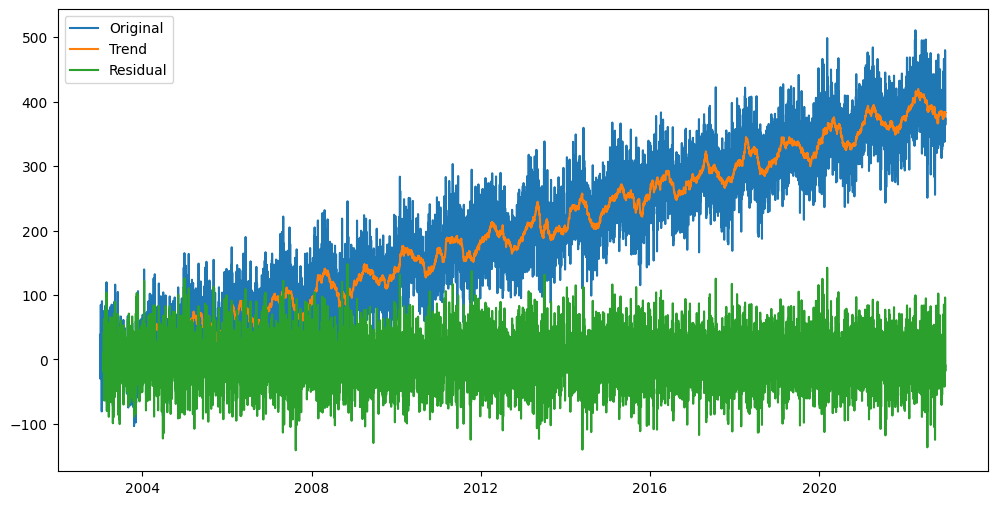

In [5]:
from pandas.plotting import autocorrelation_plot
import os

time_series = ts4000_indexed


rolling_mean = time_series.rolling(window=30).mean()
residual = time_series - rolling_mean

# Save the series to files first
rolling_mean_path = "rolling_mean.csv"
residual_path = "residual.csv"

rolling_mean.to_csv(rolling_mean_path)
residual.to_csv(residual_path)

yprov4ml.log_artifact("rolling_mean", rolling_mean_path)
yprov4ml.log_artifact("residual", residual_path)


plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original')
plt.plot(rolling_mean, label='Trend')
plt.plot(residual, label='Residual')
plt.legend()
plt.show()

In [6]:
# End run
yprov4ml.end_run(create_graph=True, create_svg=True)